<a href="https://colab.research.google.com/github/sheikhomer/FoodHubDataAnalysis/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
# Commented out the above line for installation, because, Google Collab comes with updated version of numpy,pandas, matplotlin and seaborn installed

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/AI_ML_PGP/Projects/FoodHubDataAnalysis/foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
* There are 1898 rows in the dataset
* There are 9 columns in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info() # summary of the dataframe and its data structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
df.head() # print first 5 columns

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [9]:
df.tail() # print last 5 columns

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:
* order_id, customer_id, food_preparation_time and delivery_time columns have data type int64(64-bit integer)
* cost_of_the_order column has data type float64(64-bit floating point number)
* restaurant_name, cuisine_type, day_of_the_week and rating columns have data type object
* rating column is not a numeric column rather it is a column with data type object
* order_id and customer_id are categorical data though it has numeric data type

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

#### Checking for missing values (NaN, Null and Empty values)

In [10]:
# Write your code here
df.isnull().sum() # Checking for missing values (Nan and Null values)

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [11]:
df.eq('').sum() # check the number of empty strings in the dataframe

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


* Dataframe doesn't contain any missing value and empty string
* Given the rating column is not numeric, we want to further analyse it for missing value

#### Analyse the rating column for missing value

In [12]:
df['rating'].unique() # check the unique values in the rating column

array(['Not given', '5', '3', '4'], dtype=object)

* 'Not given' is not a missing value and we can do categorical data analysis of this column given we have only 4 unique data points
* For numerical analysis of rating column, we can create a separate column with data type float by replacing 'Not given' with np.nan.

In [13]:
df['numerical_rating'] = df['rating'].replace('Not given', np.nan) # new column 'numerical_rating' with value 0 as replacement of 'Not given'
df['numerical_rating'] = df['numerical_rating'].astype(float) # convert the data type to float for 'numerical_rating' column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,numerical_rating
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0


#### Observations:
* Dataframe doesn't contain any missing value and empty string
* 'rating' column can be analysed categorically as it has only 4 unique data points. 'Not given' should not be treated as a missing value
* For numerical analysis of rating column, we have created a separate column "numerical_rating" with data type float by replacing 'Not given' with NaN.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
# Write your code here
df.describe(include = 'all').T # Ge the statistical summary in a transposed dataframe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
numerical_rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0


#### Observations:
* It is observed that minimum food preparation time is 20 minute, maximum food preparation time is 35 minute and average food preparation time 27.37 minute
* It is also observed that top restaurant is Shake Shack and top cuisine_type is American.
* Most of the orders are placed in the weekend


### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
# Write the code here
# count of orders not rated and its percentage
pd.DataFrame({
    'count': [(df['rating'] == 'Not given').sum()],
    'percentage': [(df['rating'] == 'Not given').sum()/df.shape[0]*100]
})

,count,percentage
0,736,38.777661


#### Observations:
* 736 orders are not rated which is 38.77%

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Univariate analysis categrorical data

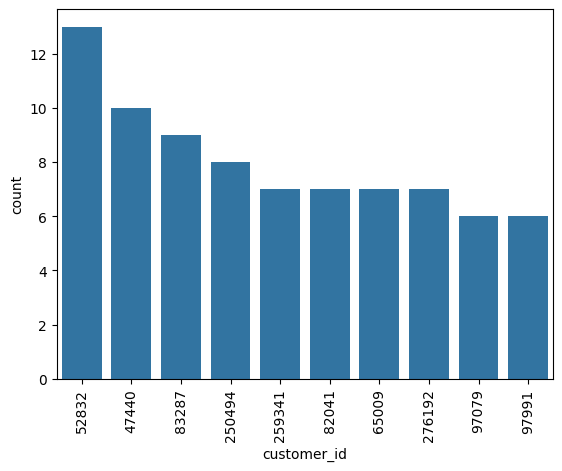

In [66]:
# Write the code here
# Top 10 customer in terms of number of orders
top10_loyal_customer = df['customer_id'].value_counts().reset_index().head(10)
sns.countplot(data = df, x = 'customer_id', order = top10_loyal_customer['customer_id'])
plt.xticks(rotation = 90)
plt.show()


In [77]:
# Bottom 10 customers in terms number of orders
df['customer_id'].value_counts().tail(10)

,count
customer_id,
404649,1
209552,1
65561,1
290266,1
53513,1
385426,1
254913,1
289597,1
74412,1


In [81]:
# percentage of customer placed only one order
total_customer = df['customer_id'].nunique()
round(((df['customer_id'].value_counts()==1).sum()/total_customer)*100,2)

65.33

* Customer Id 52832 placed highest number of orders, followed by customer id 47440, 83287, 250494, 259341
* 65.33% customer placed only one order

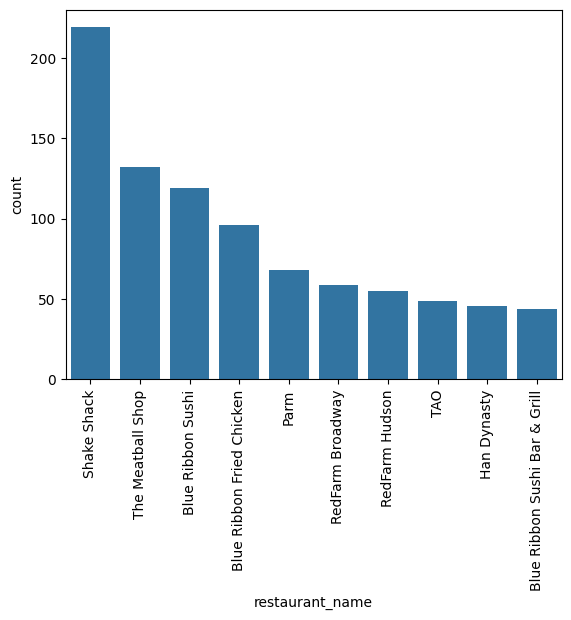

In [64]:
# Popularity of the restaurants based on number of orders
restaurant_counts = df['restaurant_name'].value_counts().reset_index().head(10)
restaurant_counts.columns = ['restaurant_name', 'count']
sns.countplot(data = df, x = 'restaurant_name', order = restaurant_counts['restaurant_name'])
plt.xticks(rotation = 90)
plt.show()

* Shake Shack is the most popular restaurant, followed by the Meatball Soup, Blue Ribbon Sushi, Blue Ribbon Fired Chicken and Pram.

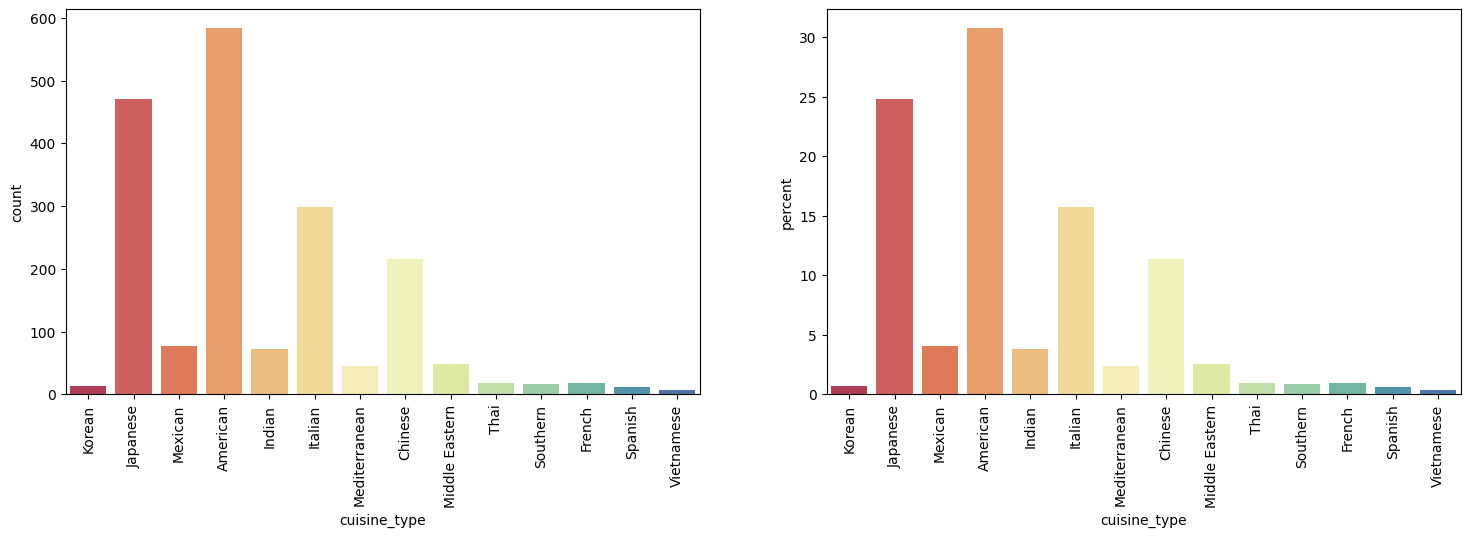

In [17]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(x = 'cuisine_type', data = df, hue = 'cuisine_type', legend = False, palette='Spectral') # countplot for cuisine_type
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = 'cuisine_type', data = df, hue = 'cuisine_type', legend = False, palette='Spectral', stat='percent') # countplot for cuisine_type with stat percentage
plt.xticks(rotation = 90)
plt.show()

* Most popular cuisine is American,followed by Japanese, Italian and Chinese
* It is observed that there are total 14 cuisine type. American and Japanese cuisine counts for more than 50% market share

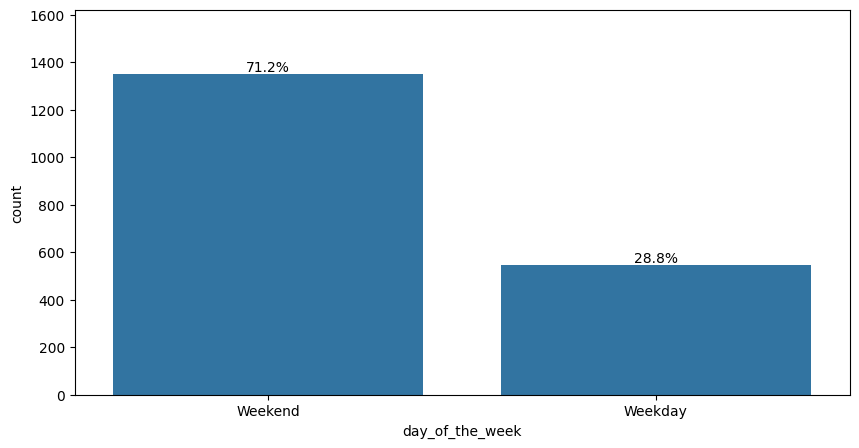

In [18]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'day_of_the_week', data = df) # countplot for day_of_the_week
total = df['day_of_the_week'].count()
ax.bar_label(ax.containers[0], fmt = lambda x: f'{(x/total)*100:0.1f}%')
ax.margins(y=0.2)
plt.show()

* Just over 71% orders are placed over the weekend

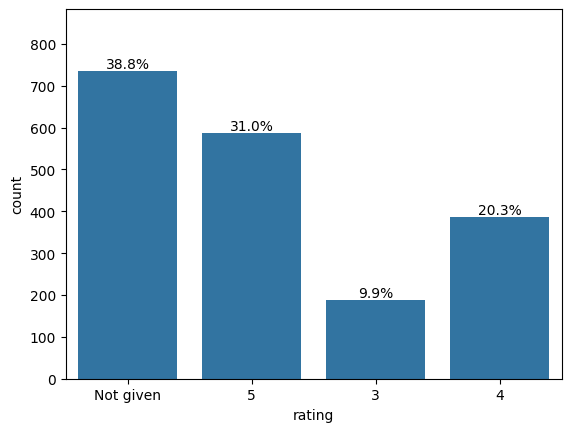

In [19]:
ax = sns.countplot(x = 'rating', data = df) # countplot for rating
total = df['rating'].count()
ax.bar_label(ax.containers[0], fmt = lambda x: f'{(x/total)*100:0.1f}%')
ax.margins(y=0.2)
plt.show()

* 38.8% of all orders are not rated
* 31% of all orders are rated 5, 20.3% of all orders are rated 4 and 9.9% of all orders are rated 3

#### Univariate Analysis of numerical data

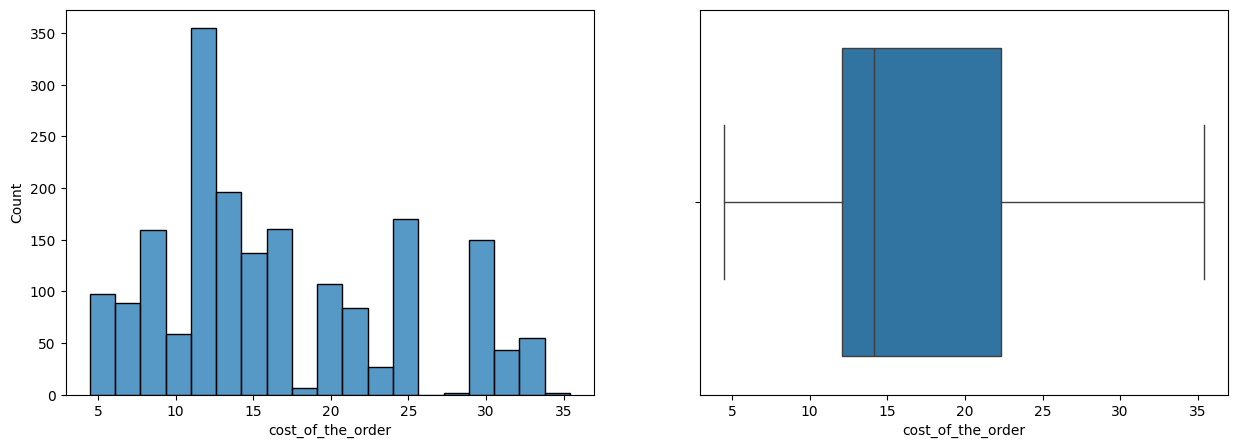

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(x = 'cost_of_the_order', data = df) # histogram for cost_of_the_order
plt.subplot(1,2,2)
sns.boxplot(x = 'cost_of_the_order', data = df) # boxplot for cost_of_the_order
plt.show()

* 50% of the orders cost around \$14 and 75% of the orders cost around \$22
* The distribution of cost_of_the_order is right skewed
* There is no outlier in this distribution

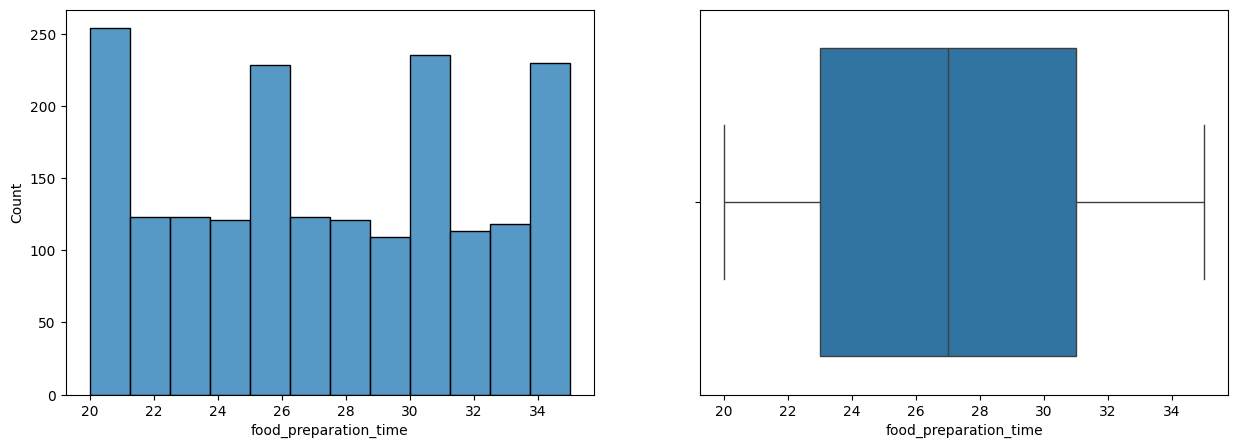

In [21]:
# histogram and box plot for food_preparation_time
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(x = 'food_preparation_time', data = df)
plt.subplot(1,2,2)
sns.boxplot(x = 'food_preparation_time', data = df)
plt.show()

* It is observed that food_preparation_time has almost uniform distribution
* It takes around 27 min to prepare food for 50% of the orders  

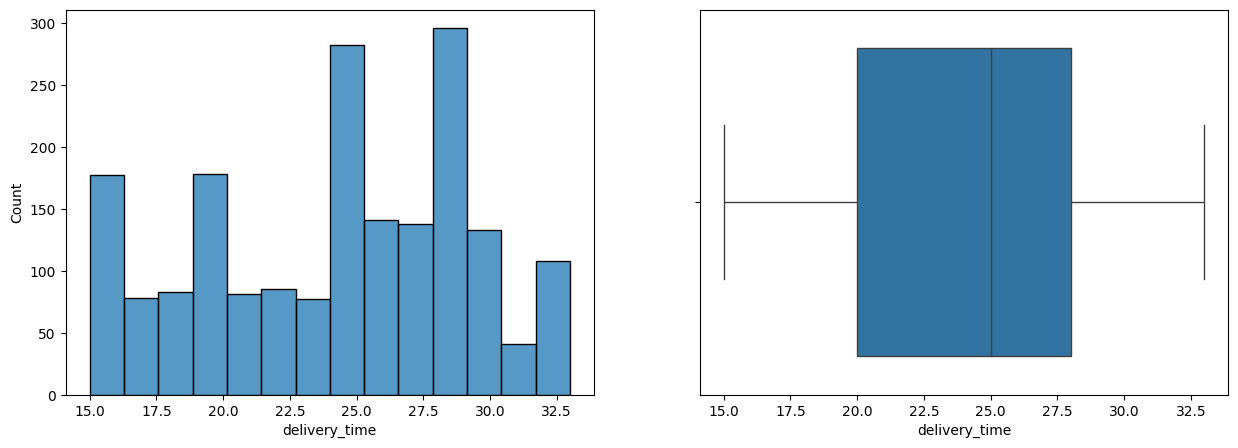

In [22]:
# histogram and box plot for delivery_time
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(x = 'delivery_time', data = df)
plt.subplot(1,2,2)
sns.boxplot(x = 'delivery_time', data = df)
plt.show()

* 50% of the deliveries are complted within 25 minute and 75% of the delivery are completed within 28 min

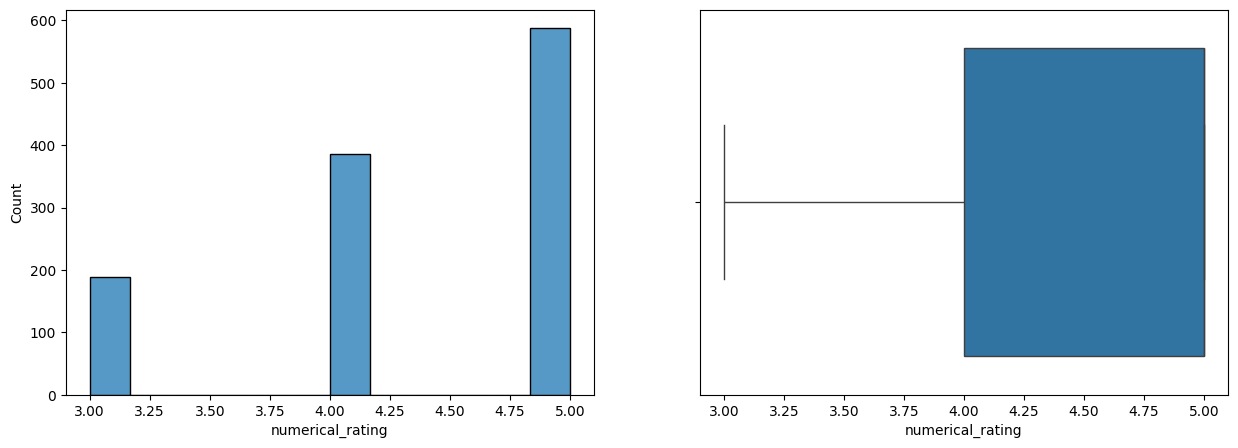

In [23]:
# histogram and box plot for numerical_rating
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(x = 'numerical_rating', data = df)
plt.subplot(1,2,2)
sns.boxplot(x = 'numerical_rating', data = df)
plt.show()

* It is observed that orders those are rated, 75% of them are rated 4 and above

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [24]:
# Write the code here
restaurant_counts = df['restaurant_name'].value_counts().reset_index() # count of distinct restaurants in descending order
restaurant_counts.columns = ['restaurant_name', 'count'] # rename columns
restaurant_counts.head() # print top 5 restaurants

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
* It is observed that the top 5 restaurants in terms of number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

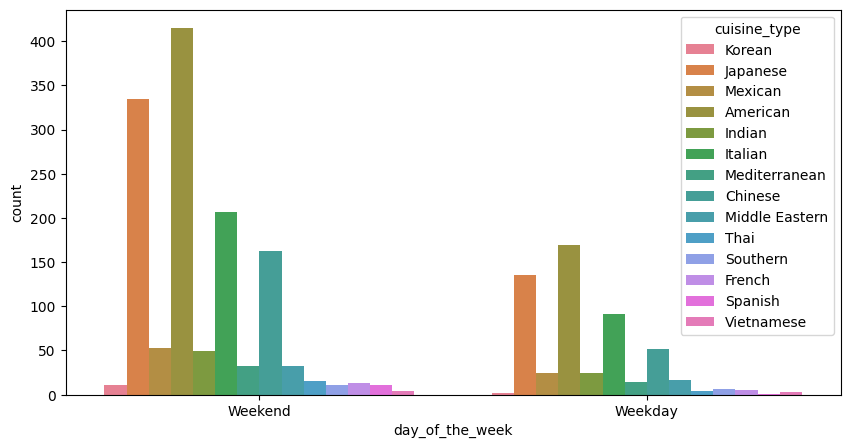

In [25]:
# Write the code here
plt.figure(figsize = (10,5))
sns.countplot(x='day_of_the_week',hue='cuisine_type', data=df)
plt.show()

#### Observations:
* From the chart above it is observed that the most popular cuisine on weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Write the code here
round((df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100,2) # percentage of orders cost more than 20 dollars

29.24

#### Observations:
* 29.2% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Write the code here
df['delivery_time'].mean().round(2)

24.16

#### Observations:
* The mean order delivery time is 24.16 minute

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Write the code here
top_customers = df['customer_id'].value_counts().reset_index() # count of distinct customers in descending order
top_customers.columns = ['customer_id', 'count'] # rename columns
top_customers.head(3) # print top 3 customers

,customer_id,count
0,52832,13
1,47440,10
2,83287,9


#### Observations:
* Top 3 customer IDs are 52832,47440 and 83287 and the number of orders placed by them are 13, 10 and 9 respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Correlation

In [29]:
# Write the code here
# We will create a new column 'total_waiting_time' by adding 'food_preparation_time' and 'delivery_time'. We want to understand the correlation of this new column with other columns
df['total_waiting_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,numerical_rating,total_waiting_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0,49


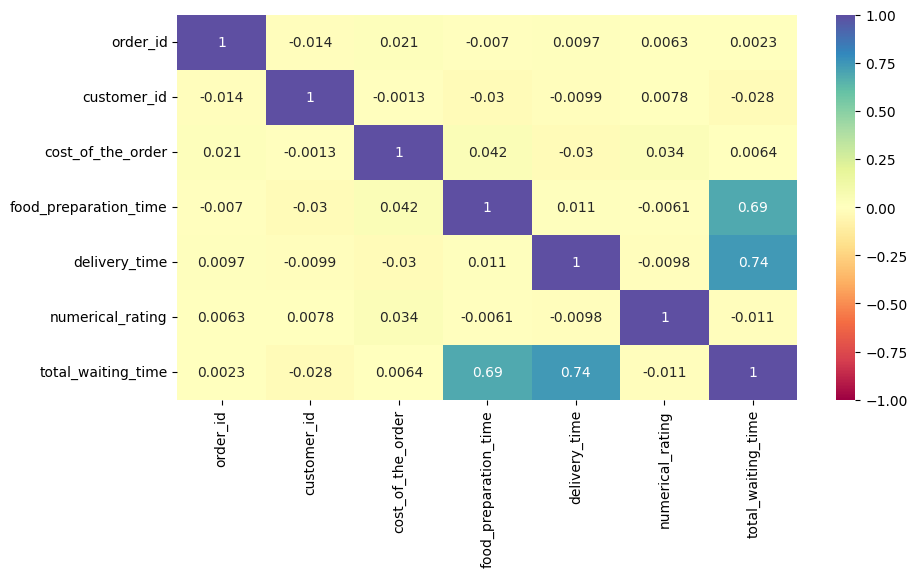

In [30]:
# Write the code here
# Correlation Heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Spectral", vmin=-1, vmax = 1)
plt.show()

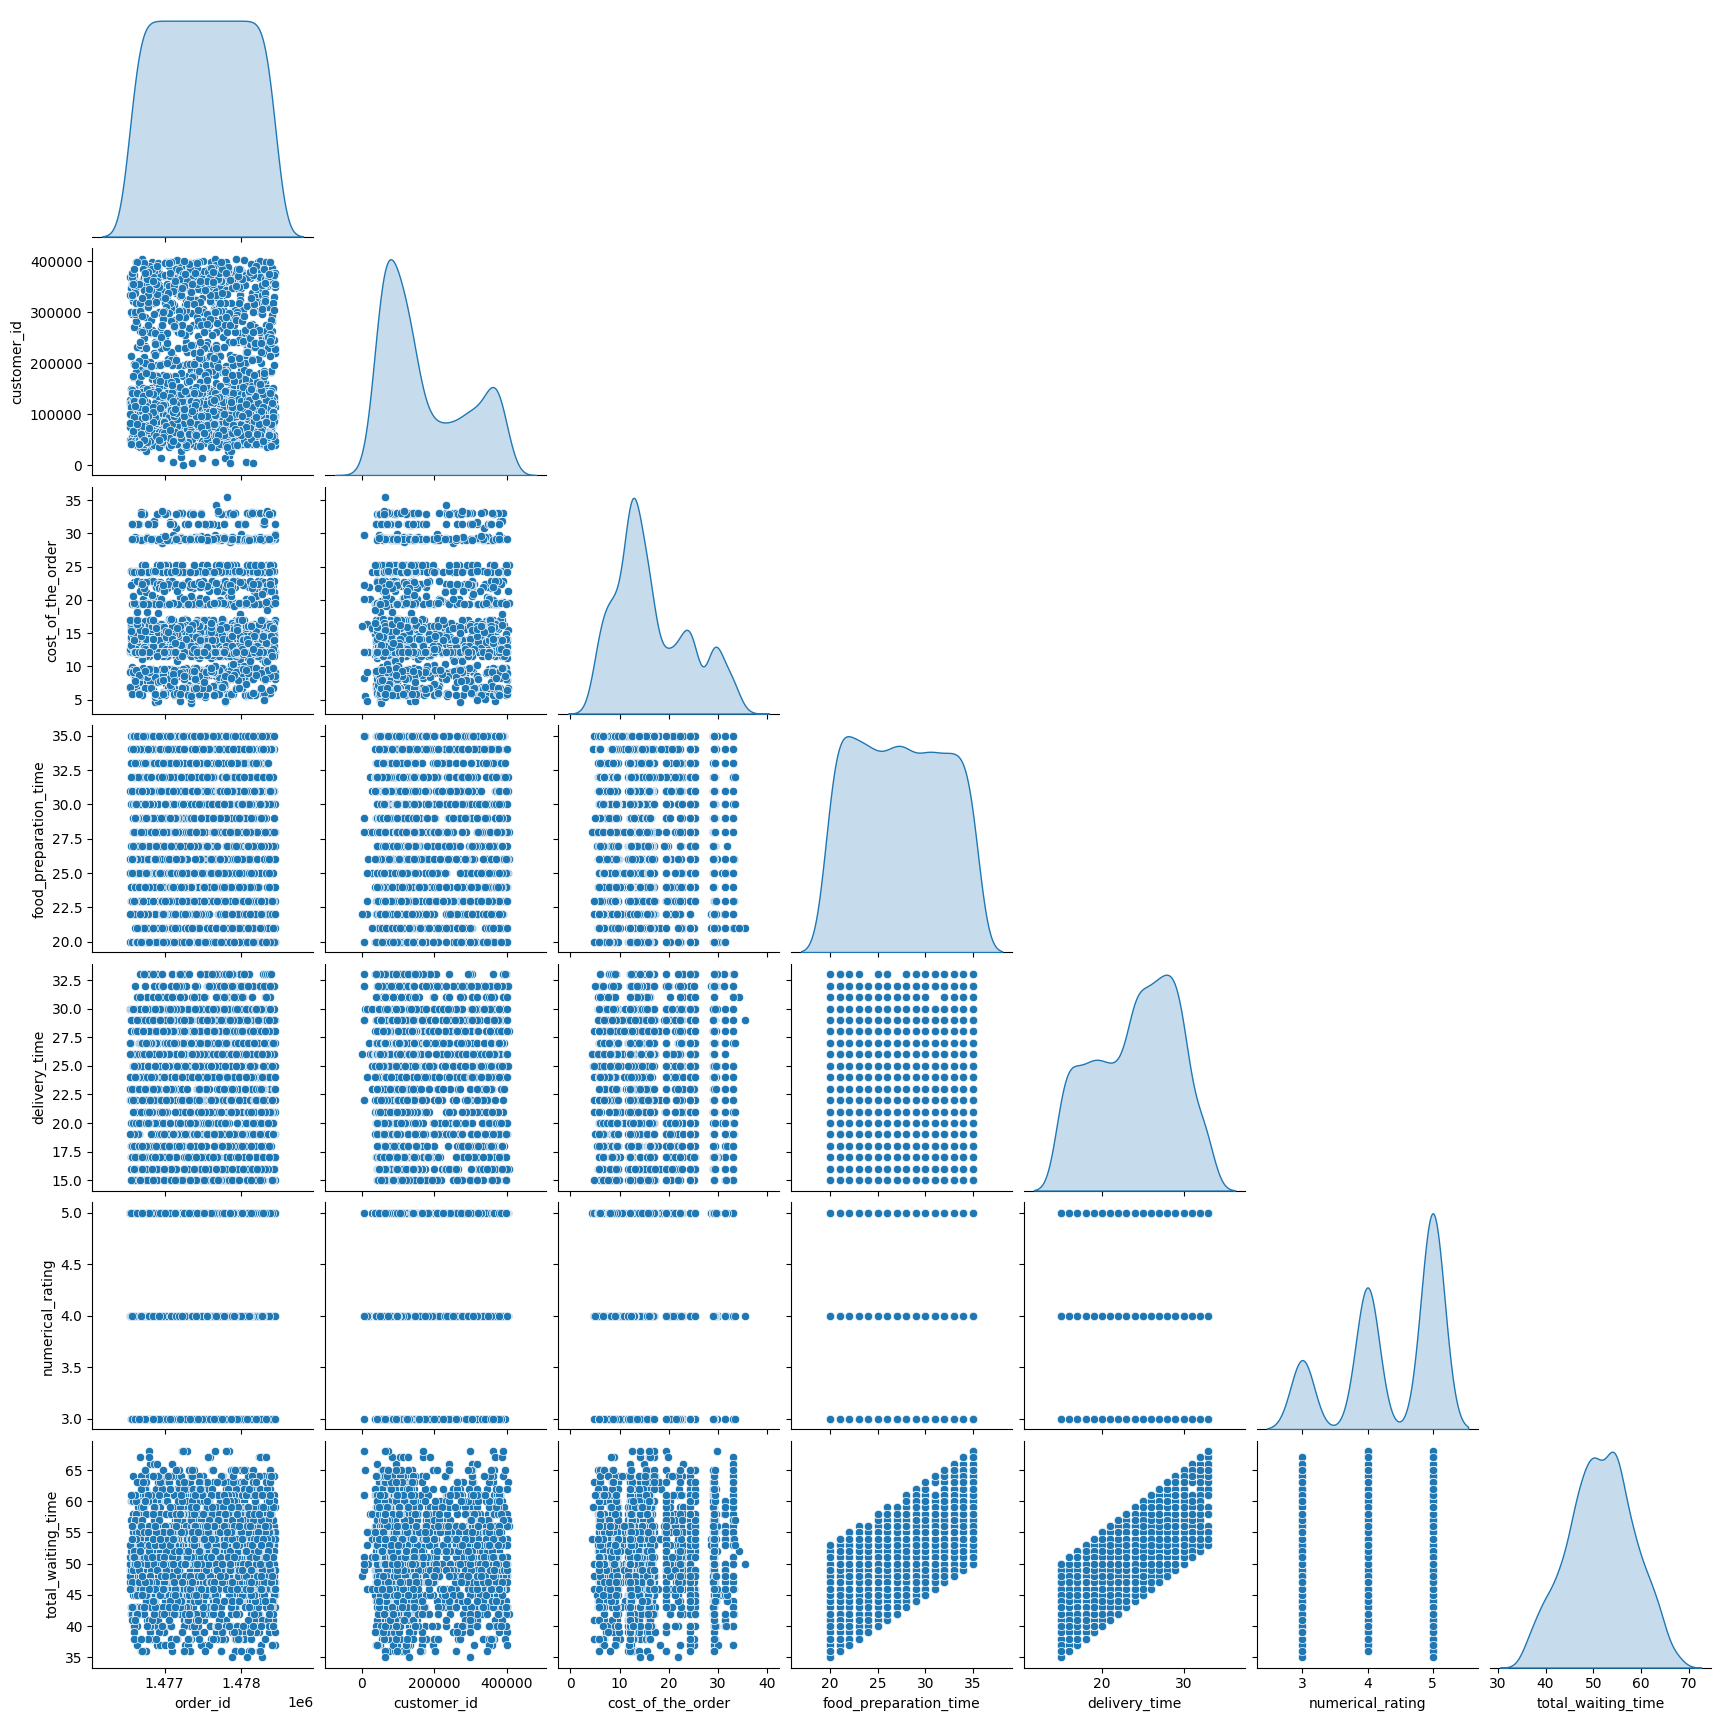

In [31]:
# Pairplot
sns.pairplot(df, diag_kind = 'kde', corner = True)
plt.show()

* It is observed from the heatmap and pairplot that total_time has strong positive correlation with delivery_time and food_preparation_time, however, this is expected as total_time is cumulation of both variables. Otherwise, we can summarise that variables are not strongly correlated


#### Total revenue distribution in weekdays and weekends

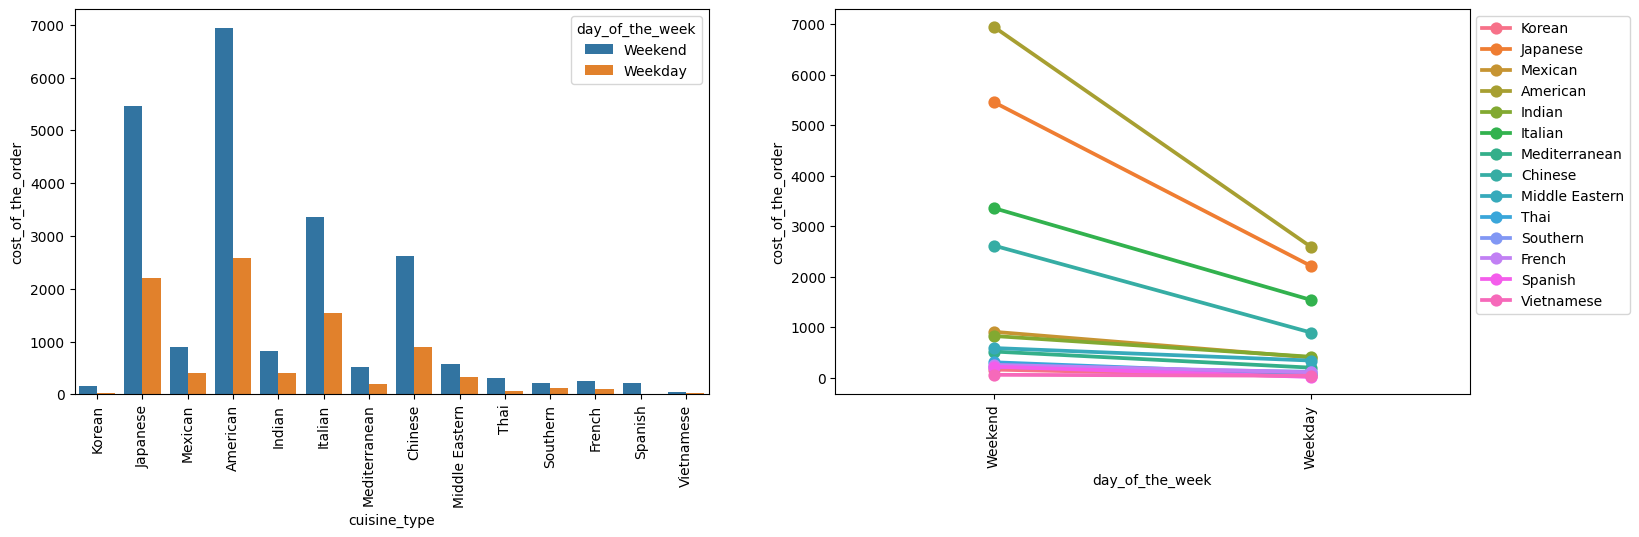

In [32]:
# Bar chart and point plot to understand the total revenue distribution in weekdays and weekend by cuisine type
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.barplot(x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', data=df, errorbar=None, estimator = 'sum')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.pointplot(x='day_of_the_week', y='cost_of_the_order', hue='cuisine_type', data=df, errorbar= None, estimator='sum')
plt.legend(bbox_to_anchor=[1, 1], loc=2)
plt.xticks(rotation=90)
plt.show()

* Previously we observed American cuisine is the most popular followed by Japaneese and Italian. Now we observed that American cuisine also generates highest amount of revenue followed by Japaneese and Italian in both weekdays and weekend
* During weekdays revenue from japaneese cuisine trailing closely to American cuisine

#### Cost of the order in terms of day of the week and cuisine type

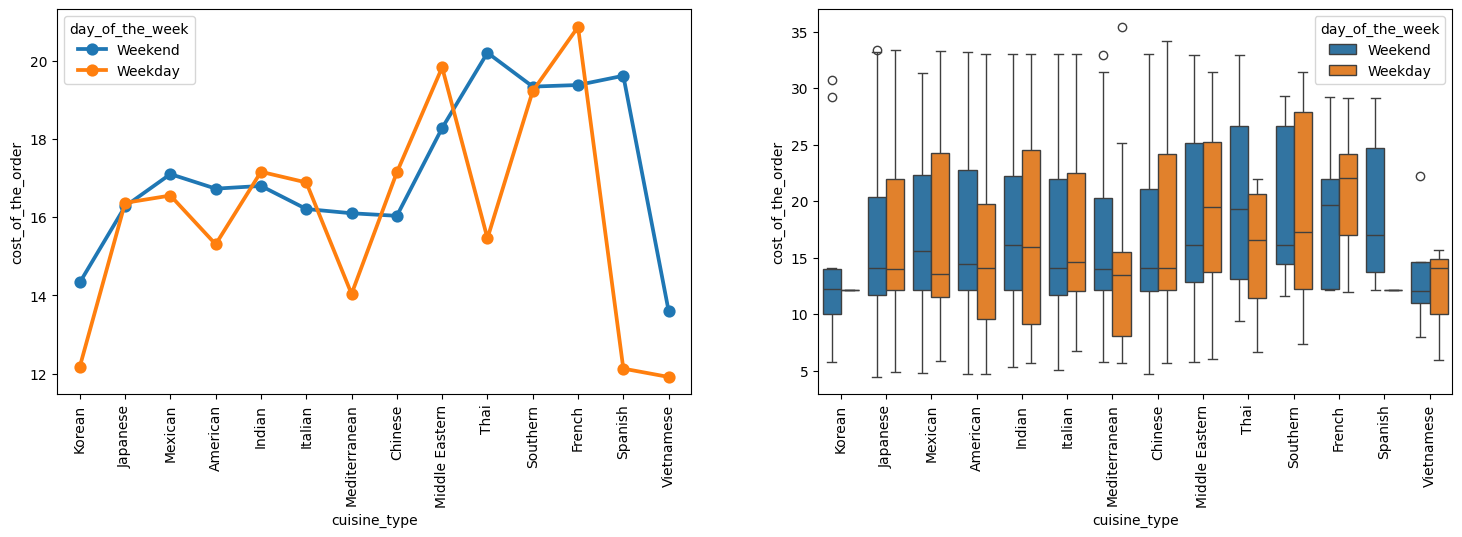

In [33]:
# point plot and box plot to understand the average cost of the order in weekdays and weekends
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.pointplot(x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', data=df, errorbar= None)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', data=df)
plt.xticks(rotation=90)
plt.show()

* Though total cost of the order over the weekdays for French cuisine is very low, the average cost of the order for french cuisine is the highest over that period. It is more than \$20.
* 75\% orders placed for french cuisine in weekdays cost more than \$17, making it the most expensive cuisine in weekdays.
* Though the total cost of the order for thai cuisine is very low over the weekend, the average cost of the order for thai cuisine is around \$20 over that period


#### Top revenue generating restaurants in terms of day of the week

In [34]:
# Total revenue distribution by restaurants and total revenue distribution for restaurant by weekdays and weekend
restaurants_revenue = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()
restaurants_revenue.columns = ['restaurant_name', 'total_revenue']
restaurants_revenue_byday = df.groupby(['restaurant_name', 'day_of_the_week'])['cost_of_the_order'].sum().reset_index()


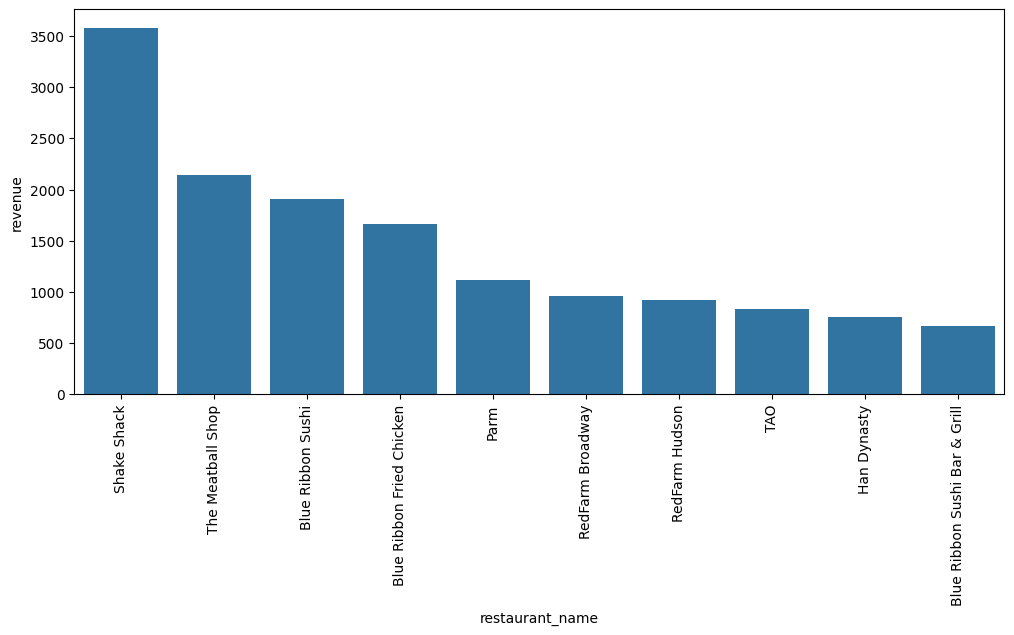

In [35]:
# Top 10 restaurant that generates the highest amount of revenue
plt.figure(figsize = (12,5))
sns.barplot(x='restaurant_name', y='total_revenue', data=restaurants_revenue.head(10))
plt.ylabel('revenue')
plt.xticks(rotation=90)
plt.show()

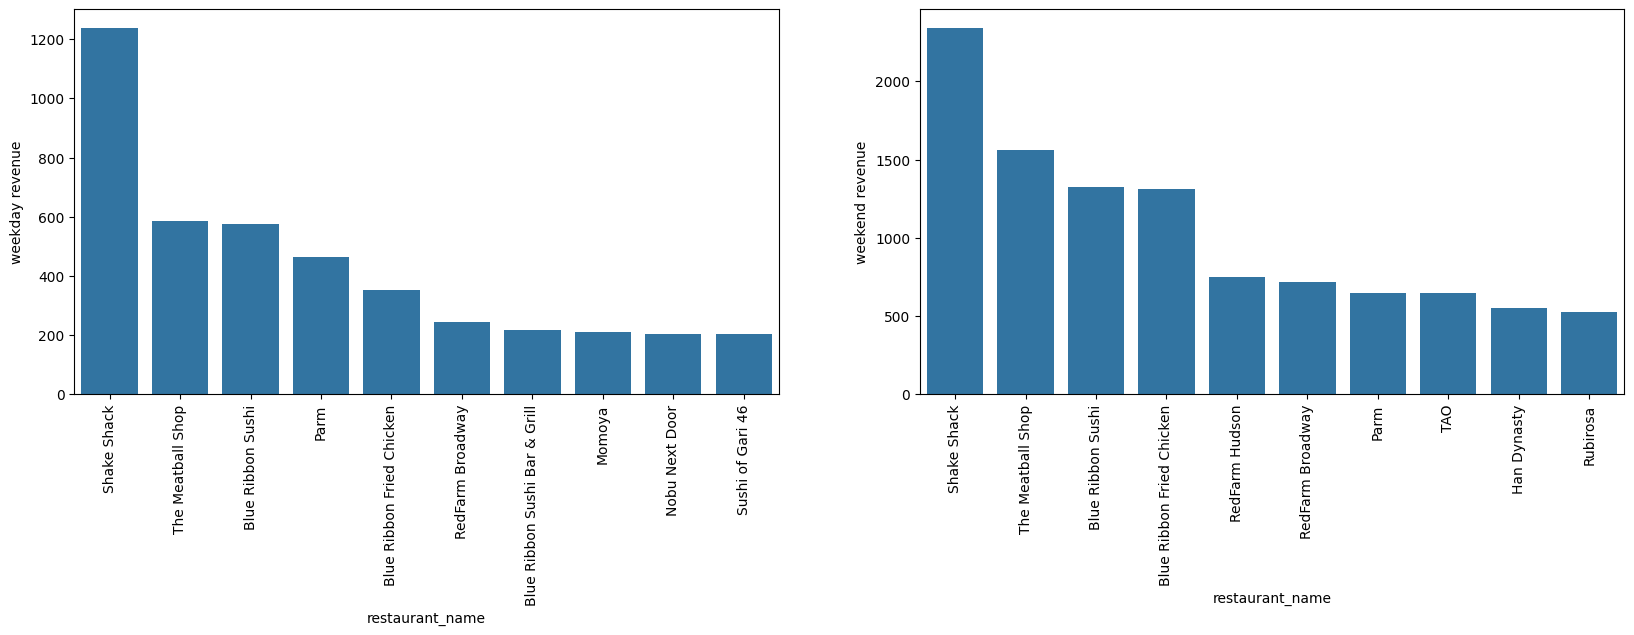

In [36]:
# Analysing top 10 restaurants that generate highest revenue weekdays and weekends individually
weekday_top10_revenue = restaurants_revenue_byday[restaurants_revenue_byday['day_of_the_week'] == 'Weekday'].sort_values(by = 'cost_of_the_order', ascending = False).head(10)
weekend_top10_revenue = restaurants_revenue_byday[restaurants_revenue_byday['day_of_the_week'] == 'Weekend'].sort_values(by = 'cost_of_the_order', ascending = False).head(10)
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.barplot(x='restaurant_name', y='cost_of_the_order', data=weekday_top10_revenue)
plt.xticks(rotation=90)
plt.ylabel('weekday revenue')
plt.subplot(1,2,2)
sns.barplot(x='restaurant_name', y='cost_of_the_order', data=weekend_top10_revenue)
plt.ylabel('weekend revenue')
plt.xticks(rotation=90)
plt.show()

* Top 5 restaurants in terms of number of number of orders and in terms total revenue are same. They are in descending order: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chciken and Parm
* Though the top 5 restaurants in terms of total reveneue in weekdays are same as total revenue combined weekend and weekdays, in weekdays parm generates more revenue than Blue Ribbon Fried Chicken
* In weekends top 5 restaurants in terms of total reveneue are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and RedFarmHudon.
* Though Parm is the 4th highest revenue generating restaurant in weekdays and the 5th highest overall, Parm's position is 7th in weekend for revenue generation.

#### Top restaurants in terms of avg order cost and days of the week

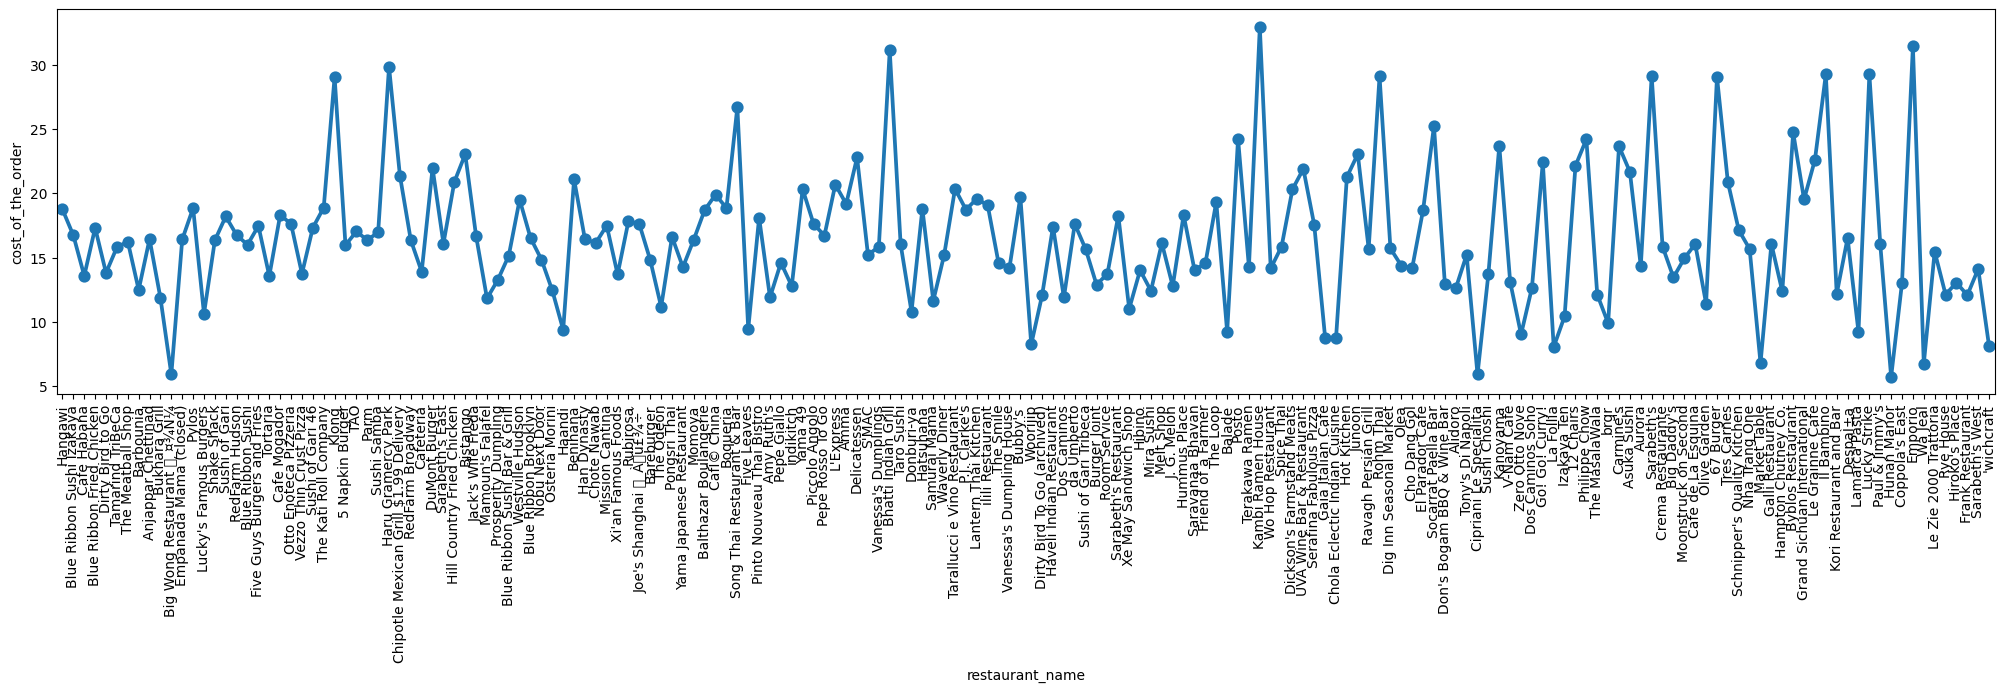

In [82]:
# We will plot a point plot to understand the distribution of mean cost of the order by restaurant
import warnings # import warnings to ignore warning about font
with warnings.catch_warnings():
  warnings.filterwarnings("ignore") # ignore warning about font not available
  plt.figure(figsize = (25,5))
  sns.pointplot(x='restaurant_name', y='cost_of_the_order', data=df, errorbar= None)
  plt.xticks(rotation=90)
  plt.show()

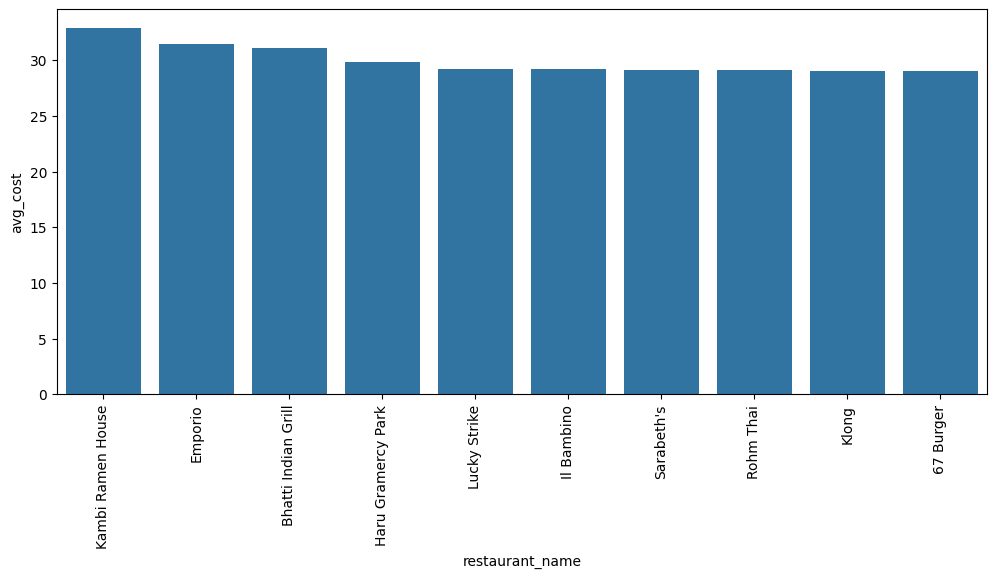

In [38]:
# Bar plot for the top 10 restaurants in terms avg order cost
mean_cost_by_restaurant = df.groupby(['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending = False).reset_index() # mean cost of the order by restaurant name
mean_cost_by_restaurant.columns = ['restaurant_name', 'avg_cost']
plt.figure(figsize = (12,5))
sns.barplot(x='restaurant_name', y='avg_cost', data=mean_cost_by_restaurant.head(10))
plt.xticks(rotation=90)
plt.show()

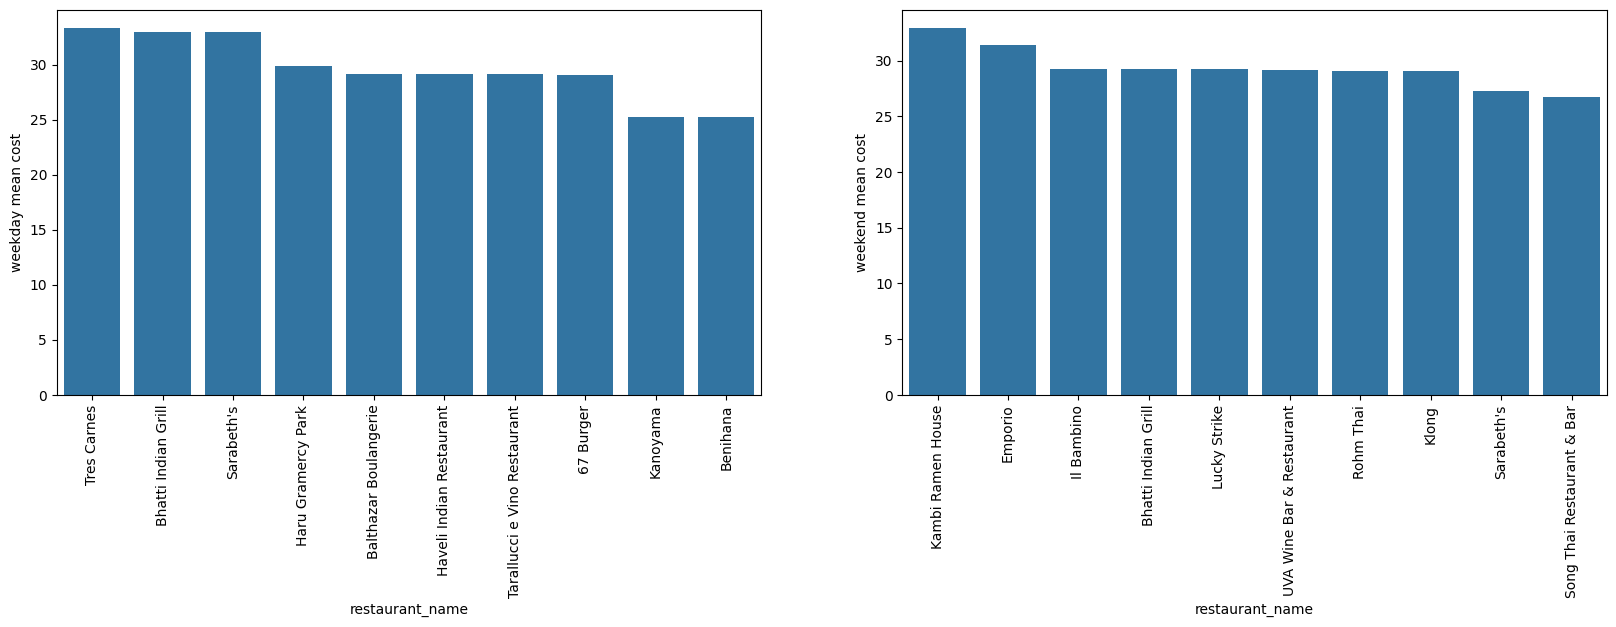

In [39]:
mean_cost_by_restaurant_day = df.groupby(['restaurant_name', 'day_of_the_week'])['cost_of_the_order'].mean().reset_index() # mean cost of the order by restaurant name and day of the week
mean_cost_by_restaurant_weekday = mean_cost_by_restaurant_day[mean_cost_by_restaurant_day['day_of_the_week'] == 'Weekday'].sort_values(by = 'cost_of_the_order', ascending = False)
mean_cost_by_restaurant_weekend = mean_cost_by_restaurant_day[mean_cost_by_restaurant_day['day_of_the_week'] == 'Weekend'].sort_values(by = 'cost_of_the_order', ascending = False)
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.barplot(x='restaurant_name', y='cost_of_the_order', data=mean_cost_by_restaurant_weekday.head(10))
plt.xticks(rotation=90)
plt.ylabel('weekday mean cost')
plt.subplot(1,2,2)
sns.barplot(x='restaurant_name', y='cost_of_the_order', data=mean_cost_by_restaurant_weekend.head(10))
plt.ylabel('weekend mean cost')
plt.xticks(rotation=90)
plt.show()

* Top 5 resturants for average order cost are Kambi Ramen House, Emporio, Bhatti Indian Grill, Haru Gramercy Park, Lucky Strike
* Top 5 restaurants for average order cost in weekdays are Tres Carnes, Bhatti Indian Grill, Sarabeth's, Haru Gramercy Park, Balthazar Boulangerie
* Top 5 restaurants for average order cost in weekends are Kambi Ramen House, Emporio, Bambino, Bhatti Indian Grill and Lucky Strike

#### Analysis of loyal customer and cost of the orders

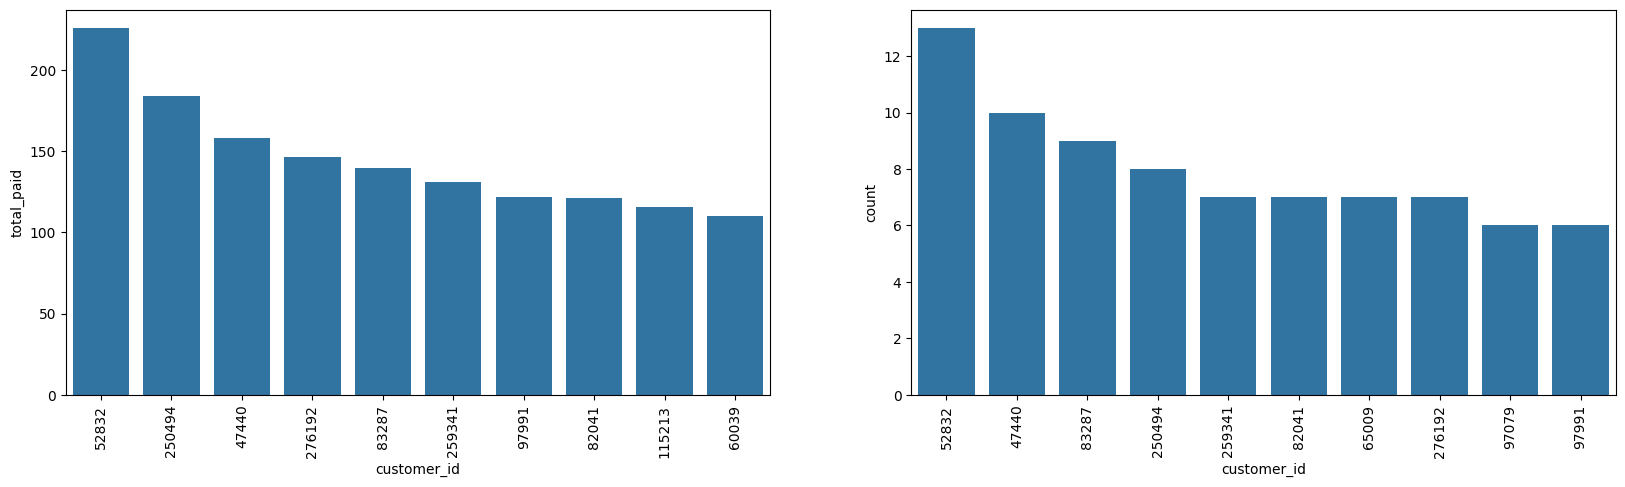

In [98]:
top10_customers_by_rev = df.groupby(['customer_id'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index().head(10)
top10_customers_by_rev.columns = ['customer_id', 'total_paid']
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.barplot(x='customer_id', y='total_paid', data=top10_customers_by_rev, order=top10_customers_by_rev['customer_id']) # bar plot for customer_id by total order value
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'customer_id', order = top10_loyal_customer['customer_id']) # count plot by customer_id
plt.xticks(rotation=90)
plt.show()

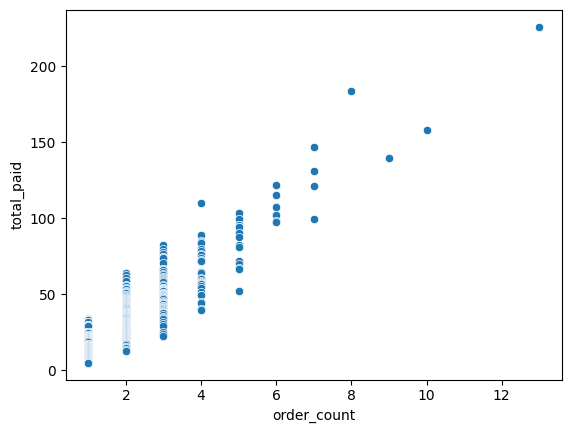

In [135]:
customers_by_rev = df.groupby(['customer_id'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()
loyal_customers = df['customer_id'].value_counts().reset_index()
customers_by_rev_order_count = pd.merge(customers_by_rev, loyal_customers, on='customer_id')
customers_by_rev_order_count.columns = ['customer_id', 'total_paid', 'order_count']
sns.scatterplot(data=customers_by_rev_order_count, x='order_count', y='total_paid')
plt.show()

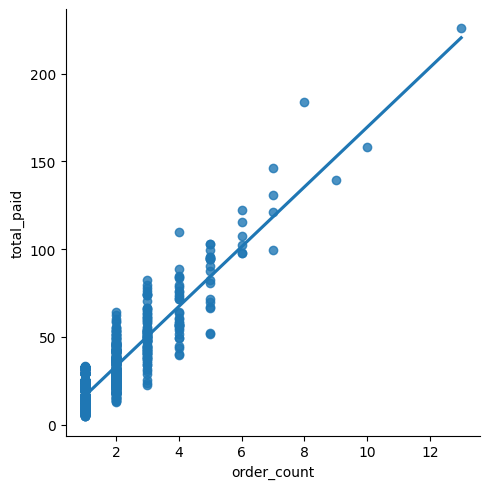

In [109]:
sns.lmplot(data=customers_by_rev_order_count, x='order_count', y='total_paid', ci=False)
plt.show()

* It is observed that total order value for a customer increases as the customer orders more and more
* Though above is generally true, Top 10 customer in terms of order value and top 10 customer in terms order count are not exactly same

#### Relationship between average order cost and total revenue of a restaurant

In [40]:
# merge table restaurants_revenue and mean_cost_by_restaurant
restaurant_order_revnue = pd.merge(restaurants_revenue, mean_cost_by_restaurant, on='restaurant_name')


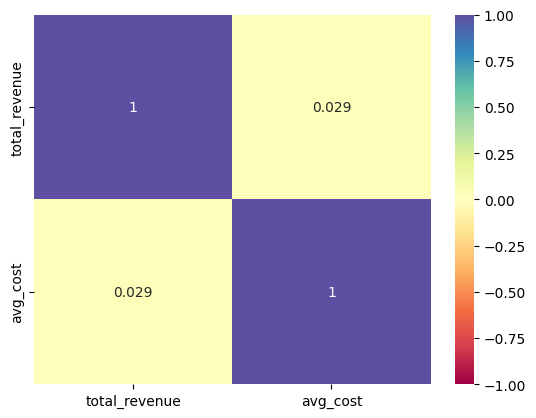

In [41]:
# relation between average order cost and total revenue
sns.heatmap(restaurant_order_revnue.corr(numeric_only=True), annot=True, cmap="Spectral", vmin=-1, vmax = 1)
plt.show()

* It is observed from the heatmap that there is no strong correlation between average cost and total revenue

#### Relationship among average rating, total rating and rating count

In [42]:
# count of rating by restaurant
restaurant_by_rating_count = df.groupby(['restaurant_name'])['numerical_rating'].count().sort_values(ascending=False).reset_index()
restaurant_by_rating_count.columns = ['restaurant_name', 'rating_count']
restaurant_by_rating_count.head()


,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [43]:
# sum of rating by restaurant
restaurant_by_rating_sum = df.groupby(['restaurant_name'])['numerical_rating'].sum(numeric_only=True).sort_values(ascending=False).reset_index()
restaurant_by_rating_sum.columns = ['restaurant_name', 'total_rating']
restaurant_by_rating_sum.head()


,restaurant_name,total_rating
0,Shake Shack,569.0
1,The Meatball Shop,379.0
2,Blue Ribbon Sushi,308.0
3,Blue Ribbon Fried Chicken,277.0
4,RedFarm Broadway,174.0


In [44]:
# average rating by restaurant
restaurant_by_avg_rating = df.groupby(['restaurant_name'])['numerical_rating'].mean(numeric_only=True).sort_values(ascending=False).reset_index()
restaurant_by_avg_rating.columns = ['restaurant_name', 'avg_rating']
restaurant_by_avg_rating.head()

,restaurant_name,avg_rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0


In [45]:
# let's merge restaurant_by_rating_count,restaurant_by_rating_sum,restaurant_by_avg_rating into a single data frame so we can analyse the ratings
restaurant_rating = pd.merge(pd.merge(restaurant_by_rating_count, restaurant_by_rating_sum, on='restaurant_name'), restaurant_by_avg_rating, on='restaurant_name')
restaurant_rating.head()

,restaurant_name,rating_count,total_rating,avg_rating
0,Shake Shack,133,569.0,4.278195
1,The Meatball Shop,84,379.0,4.511905
2,Blue Ribbon Sushi,73,308.0,4.219178
3,Blue Ribbon Fried Chicken,64,277.0,4.328125
4,RedFarm Broadway,41,174.0,4.243902


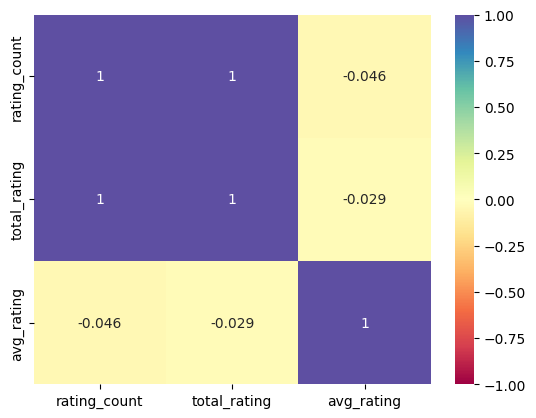

In [46]:
# heatmap to understand the correlation of rating data
sns.heatmap(restaurant_rating.corr(numeric_only=True), annot=True, cmap="Spectral", vmin=-1, vmax = 1)
plt.show()

* From the abvoe heatmap we observe that total rating and rating count are strongly correlated as it is expected
* Average rating neither has strong correlation with total rating nor rating count

#### Relationship between rating and revenue

In [47]:
# merge table restaurant_rating and restaurant_order_revenue
restaurant_rating_revenue = pd.merge(restaurant_rating, restaurant_order_revnue, on='restaurant_name')
restaurant_rating_revenue.head()

,restaurant_name,rating_count,total_rating,avg_rating,total_revenue,avg_cost
0,Shake Shack,133,569.0,4.278195,3579.53,16.344886
1,The Meatball Shop,84,379.0,4.511905,2145.21,16.251591
2,Blue Ribbon Sushi,73,308.0,4.219178,1903.95,15.999580
3,Blue Ribbon Fried Chicken,64,277.0,4.328125,1662.29,17.315521
4,RedFarm Broadway,41,174.0,4.243902,965.13,16.358136


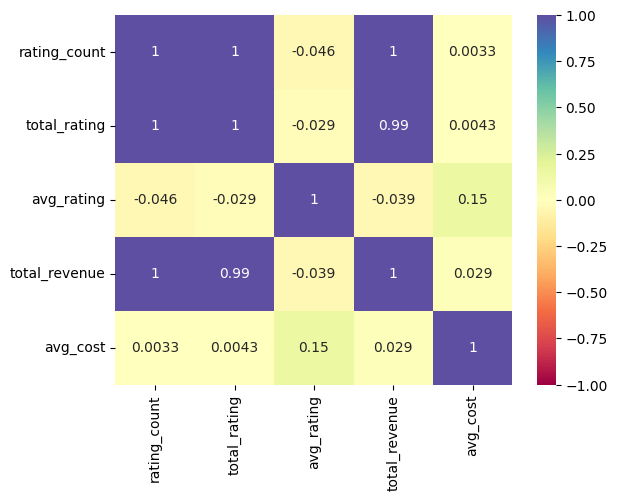

In [48]:
# correlation between columns
sns.heatmap(restaurant_rating_revenue.corr(numeric_only=True), annot=True, cmap="Spectral", vmin=-1, vmax = 1)
plt.show()

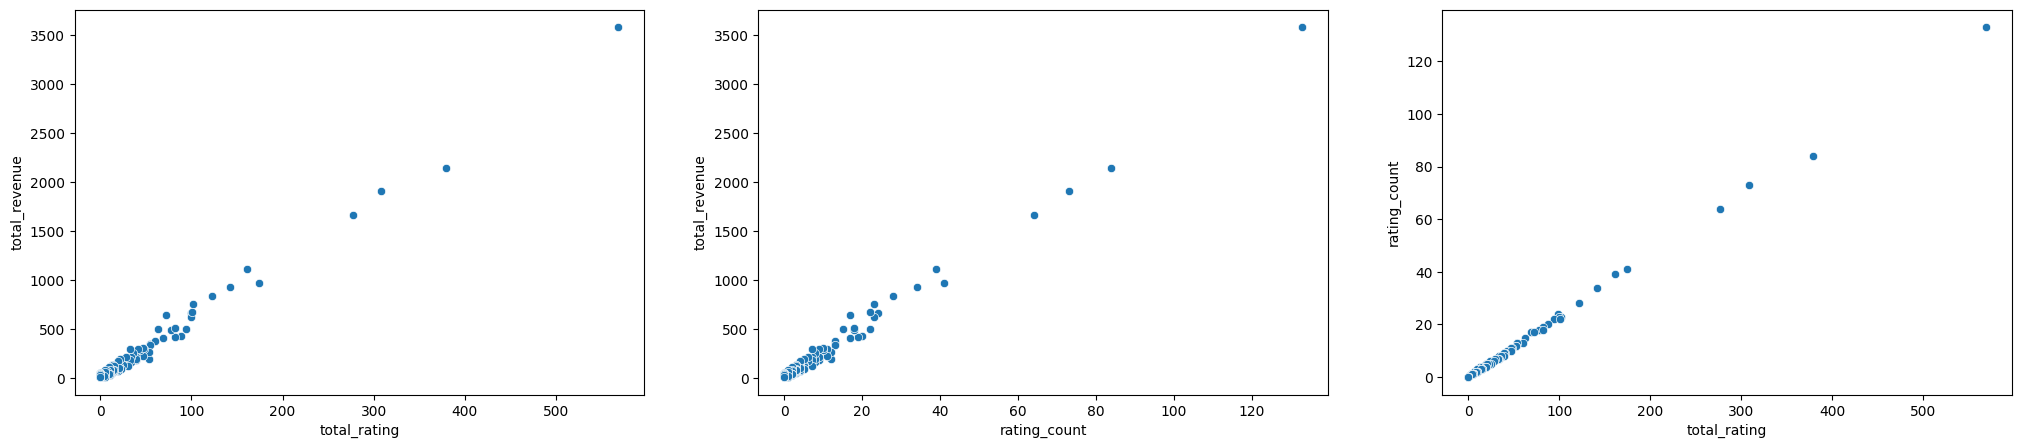

In [49]:
# scatter plots to understand the relationship between total rating and total reveneue, rating count and total revenue, total rating and rating count
plt.figure(figsize = (25,5))
plt.subplot(1,3,1)
sns.scatterplot(data=restaurant_rating_revenue, x='total_rating', y='total_revenue')
plt.subplot(1,3,2)
sns.scatterplot(data=restaurant_rating_revenue, x='rating_count', y='total_revenue')
plt.subplot(1,3,3)
sns.scatterplot(data=restaurant_rating_revenue, x='total_rating', y='rating_count')
plt.show()

* Though we previously observed that cost_of_the_order column is not strongly correlated to numerical_rating column, we can now see total_revenue for a restaurant has strong positive correlation with total_rating and rating_count
* We also observe rating_count and total_rating are strongly correlated
* We can summarise that it is expected for a restaurant to generate more revenue, if it has a higher rating

#### Relationship among customer loyality, rating and revenue

In [116]:
customer_rating_count = df.groupby(['customer_id'])['numerical_rating'].count().sort_values(ascending=False).reset_index()
customer_rating_count.columns = ['customer_id', 'rating_count']
customer_rating_total = df.groupby(['customer_id'])['numerical_rating'].sum().sort_values(ascending=False).reset_index()
customer_rating_total.columns = ['customer_id', 'total_rating']
customer_rating_avg = df.groupby(['customer_id'])['numerical_rating'].mean().sort_values(ascending=False).reset_index()
customer_rating_avg.columns = ['customer_id', 'avg_rating']
customer_rating = pd.merge(pd.merge(customer_rating_count, customer_rating_total, on='customer_id'), customer_rating_avg, on='customer_id')
customer_rev_rating = pd.merge(customer_rating, customers_by_rev_order_count, on='customer_id')
customer_rev_rating.head()

,customer_id,rating_count,total_rating,avg_rating,total_paid,order_count
0,52832,7,29.0,4.142857,225.80,13
1,47440,7,27.0,3.857143,158.18,10
2,65009,6,29.0,4.833333,99.49,7
3,250494,6,28.0,4.666667,183.83,8
4,276192,5,22.0,4.400000,146.46,7


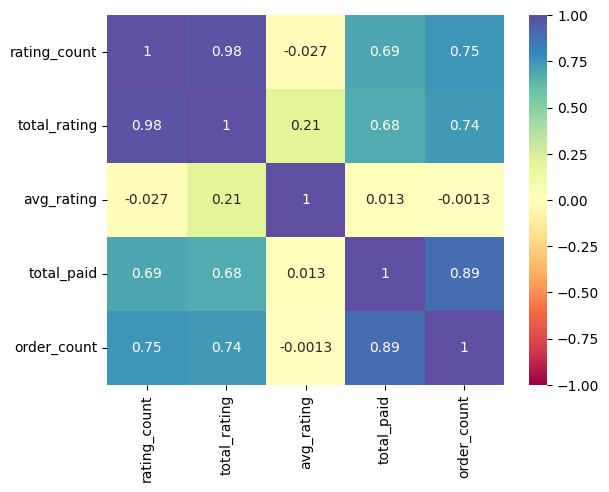

In [114]:
sns.heatmap(customer_rev_rating[['rating_count','total_rating','avg_rating', 'total_paid','order_count']].corr(), annot=True, cmap="Spectral", vmin=-1, vmax = 1) # heatmap to understand the correlation
plt.show()

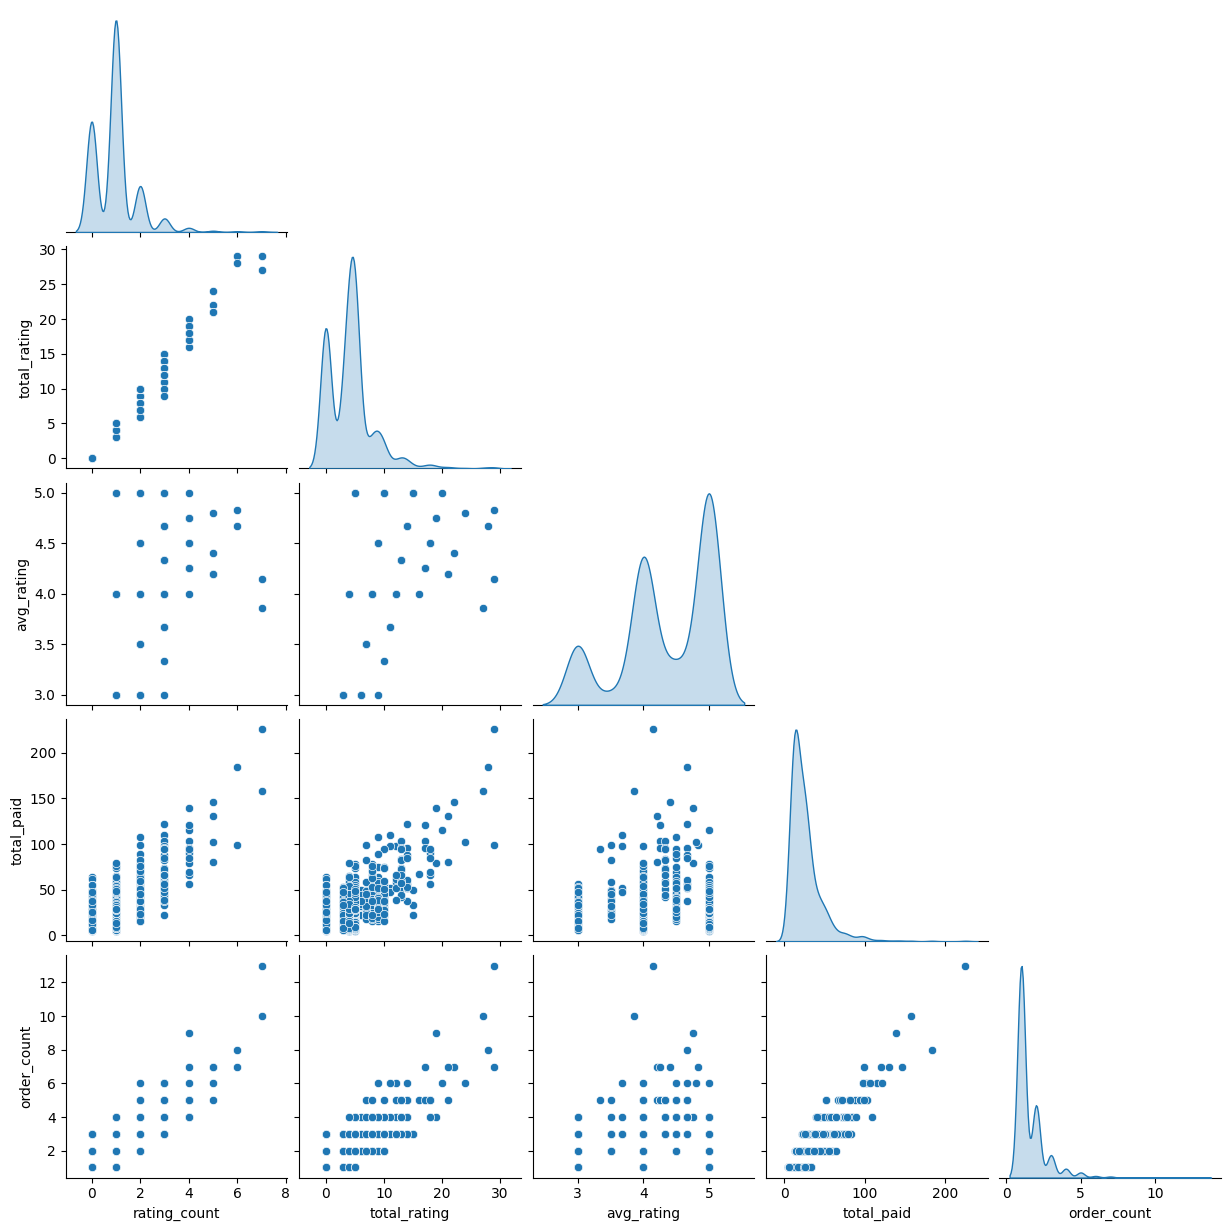

In [115]:
sns.pairplot(customer_rev_rating[['rating_count','total_rating','avg_rating', 'total_paid','order_count']], diag_kind = 'kde', corner = True) # pair plot to understand the relationship
plt.show()

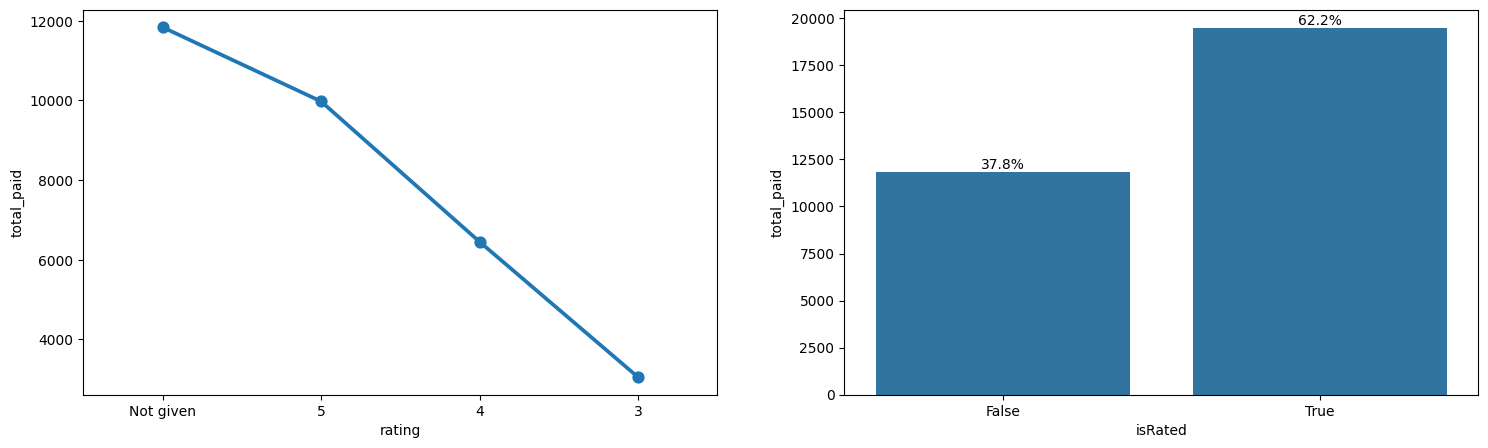

In [134]:
# Relation of rated and not rated orders with total cost paid by a customer
customers_by_rating_rev = df.groupby(['customer_id', 'rating'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()
customers_by_rating_rev.columns = ['customer_id', 'rating', 'total_paid']
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.pointplot(data=customers_by_rating_rev, x='rating', y='total_paid', estimator='sum', errorbar=None)
plt.subplot(1,2,2)
customers_by_rating_rev['isRated'] = customers_by_rating_rev['rating'] != 'Not given'
ax = sns.barplot(data=customers_by_rating_rev, x='isRated', y='total_paid', estimator='sum', errorbar = None)
total_revenue = customers_by_rating_rev['total_paid'].sum()
ax.bar_label(ax.containers[0], fmt = lambda x: f'{(x/total_revenue)*100:0.1f}%')
plt.show()

* There is a strong positive correlation between total rating by a customer and order count by a customer
* There is a strong positive correlation between order count by a customer and rating count by a customer
* Customers who rated orders cumulatively higher also paid more
* From the point plot we observe that customers cumulatively paid more for highly rated orders
* From the bar plot we observe that 62.2% revenue is generated from the order those are rated
* In summary we can say customers who generated more revenue, rated the order highly and the cumulative rating from them is high

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [50]:
# Write the code here
restaurant_rating_revenue[restaurant_rating_revenue['rating_count']>50][restaurant_rating_revenue['avg_rating']>4]

,restaurant_name,rating_count,total_rating,avg_rating,total_revenue,avg_cost
0,Shake Shack,133,569.0,4.278195,3579.53,16.344886
1,The Meatball Shop,84,379.0,4.511905,2145.21,16.251591
2,Blue Ribbon Sushi,73,308.0,4.219178,1903.95,15.999580
3,Blue Ribbon Fried Chicken,64,277.0,4.328125,1662.29,17.315521


#### Observations:
* Restaurants that have rating count more than 50 and average rating greater than 4 are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
# Write the code here
revenue_from_orders_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
revenue_from_order_over_5 =  df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]['cost_of_the_order'].sum()*0.15
net_revenue = round((revenue_from_orders_over_20 + revenue_from_order_over_5),2)
net_revenue

6166.3

#### Observations:
* The net revenue generated by the company across all orders is $6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
# Write the code here
round(df[df['total_waiting_time']>60].shape[0]/df.shape[0]*100, 2)

10.54

#### Observations:
* 10.54% orders take more than 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

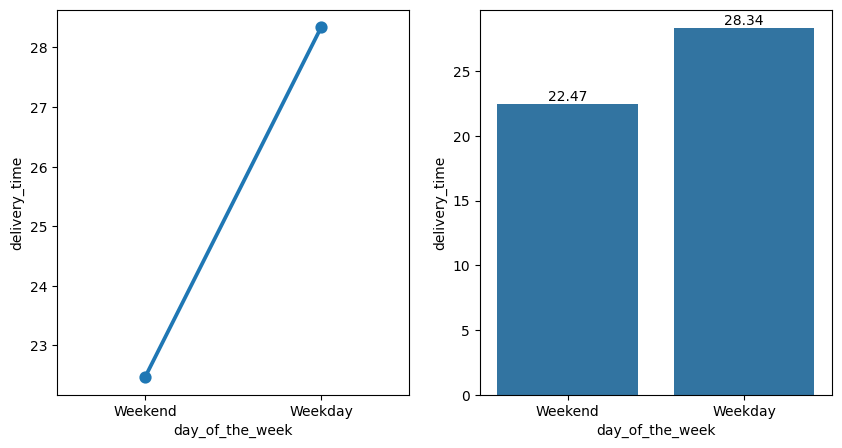

In [53]:
# Write the code here
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.pointplot(data=df, x='day_of_the_week', y='delivery_time', errorbar=None)
plt.subplot(1,2,2)
ax = sns.barplot(x='day_of_the_week', y='delivery_time', data=df, errorbar=None, estimator = 'mean')
ax.bar_label(ax.containers[0], fmt = lambda x: f'{x:0.2f}')
plt.show()

#### Observations:


* We previously observed that around 71% orders are placed in the weekends, however, average delivery time in the weekend is 22.47 minute and average delivery time in the weekdays is 28.34 min. This could be due to high traffic during weekdays.   

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---